# Building a home price prediction model using the OSEMN Framework
* Student name: Nathan Wyand
* Student pace: part time
* Scheduled project review date/time: 2019-01-25 10:00:00 EST
* Instructor name: Jeff Herman
* Blog post URL: https://www.nathanwyand.com/2019/01/23/date-to-float-python-datetime/

<div style="background-color:darksalmon">
EDA questions are marked in orange.
    <div>
    

### 1 - Obtain

In [2]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns

In [3]:
#convert CSV source file into Pandas DataFrame
data = pd.read_csv('kc_house_data.csv')
#preview the first 10 lines of data
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Comparing the imported data to the data dictionary, we now have all the columns we need.

### 2 - Scrub

#### 2.1 - Check for and deal with missing data

In [3]:
#checking for missing values
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

##### 2.1.1 - yr_renovated

In [4]:
#It looks like 'yr_renovated has the most missing values,' so we'll explore it first.
data['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [5]:
#'yr_renovated' could be turned into a categorical variable, but this would prevent us from
#finding its relationship with other variables in scatter plots later.
#Here, a related variable, 'yr_built', is examined.
data['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

<div style="background-color:darksalmon">
Q1 - Are the missing values in 'yr_renovated' due to poor record keeping or to a lack of home renovation?
</div>

Text(0,0.5,'number of houses = 17011')

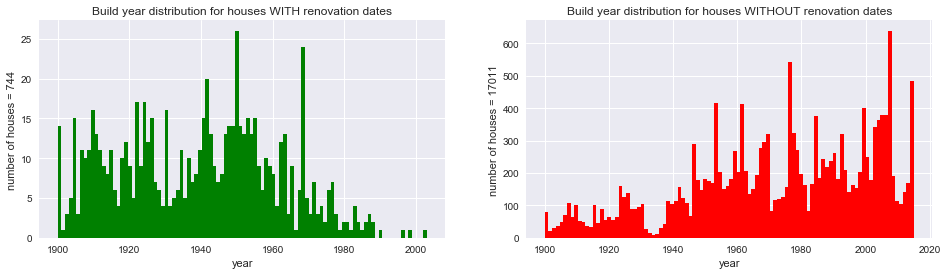

In [6]:
#create figure and 2 subplots
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#plot histogram of build dates for houses WITH renovation dates
ax1data = data.loc[data['yr_renovated']>0]['yr_built']
ax1.hist(ax1data, bins=100, color='green')
ax1.set_title('Build year distribution for houses WITH renovation dates')
ax1.set_xlabel('year')
ax1.set_ylabel('number of houses = '+str(len(ax1data)))

#plot histogram of build dates for houses WITHOUT renovation dates
ax2data = data.loc[data['yr_renovated']==0]['yr_built']
ax2.hist(ax2data, bins=100, color='red')
ax2.set_title('Build year distribution for houses WITHOUT renovation dates')
ax2.set_xlabel('year')
ax2.set_ylabel('number of houses = '+str(len(ax2data)))

There is a relatively linear increase of houses with no renovation date as build dates near the present, which is to be expected, since people don't usually renovate new houses. This tells me that the missing values are missing because no renovation took place, and not because of poorly kept records. The histogram of renovated houses demonstrates the opposite trend.

Another thing that I discovered while plotting these histograms is that the '.isna' method only counted NaN values, and not zero values. In reality only a small portion of houses have renovation dates.

In [7]:
#Upon further inspection, only 3.44% of houses have been renovated! Instead of being a variable with
#a few missing values, we find that there are only 744 renovated houses in the set of 21,597.
print(str(round(100*(len(ax1data)/data.shape[0]),2))+"% of houses have been renovated.")

3.44% of houses have been renovated.


In [8]:
#A more useful method than '.unique()' for getting a full readout on the types of 
#missing values would be '.value_counts' with dropna=False to include NaN values.
data['yr_renovated'].value_counts(dropna=False).head(10)

 0.0       17011
NaN         3842
 2014.0       73
 2003.0       31
 2013.0       31
 2007.0       30
 2005.0       29
 2000.0       29
 1990.0       22
 2004.0       22
Name: yr_renovated, dtype: int64

This is clearly a peculiar variable. It may be useful later in the process, but right now we will move on to other columns in the dataset.

##### 2.1.2 - waterfront

In [9]:
#Let's run the ".value_counts" method on the next offending column, 'waterfront'.
data['waterfront'].value_counts(dropna=False)

 0.0    19075
NaN      2376
 1.0      146
Name: waterfront, dtype: int64

'waterfront' is clearly a categorical variable, so we will use label encoding to mark the data as having a waterfront view, lacking a waterfront view, or having an unknown view.

In [10]:
#create new column to hold categorical data
data['cat_waterfront'] = ''

#iterate through series to replace 0,1, and NaN with no, yes, and unknown
for i, d in data.iterrows():
    if d['waterfront'] == 0.0:
        data.at[i, 'cat_waterfront'] = 'no'
    elif d['waterfront'] == 1.0:
        data.at[i,'cat_waterfront'] = 'yes'
    else:
        data.at[i,'cat_waterfront'] = 'unknown'

In [11]:
#convert 'cat_waterfront' to a categorical format
data['cat_waterfront'] = data['cat_waterfront'].astype('category')

In [12]:
#confirming that the column is now categorical
data.cat_waterfront.dtypes

CategoricalDtype(categories=['no', 'unknown', 'yes'], ordered=False)

##### 2.1.3 - view

In [13]:
#let's examine the last variable with NaN values, 'view'
data['view'].value_counts(dropna=False)

 0.0    19422
 2.0      957
 3.0      508
 1.0      330
 4.0      317
NaN        63
Name: view, dtype: int64

In [14]:
#since the majority of houses have not been viewed, we are going to fill NaN values with zeros.
data['view'].fillna(0.0, inplace=True)

In [15]:
#rechecking our 'view' column
data['view'].value_counts(dropna=False)

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [16]:
#now we will convert the 'view' column to categories
data['view'] = data.view.astype('category')

In [17]:
#checking column data type
data.view.dtypes

CategoricalDtype(categories=[0.0, 1.0, 2.0, 3.0, 4.0], ordered=False)

Now our 'view' column is in categorical form.

##### 2.1.4 - Summary of dealing with missing data

In [1]:
#Here we check to see the result of dealing with null values
data.isna().sum()

NameError: name 'data' is not defined

#### 2.2 - Identifying variable types

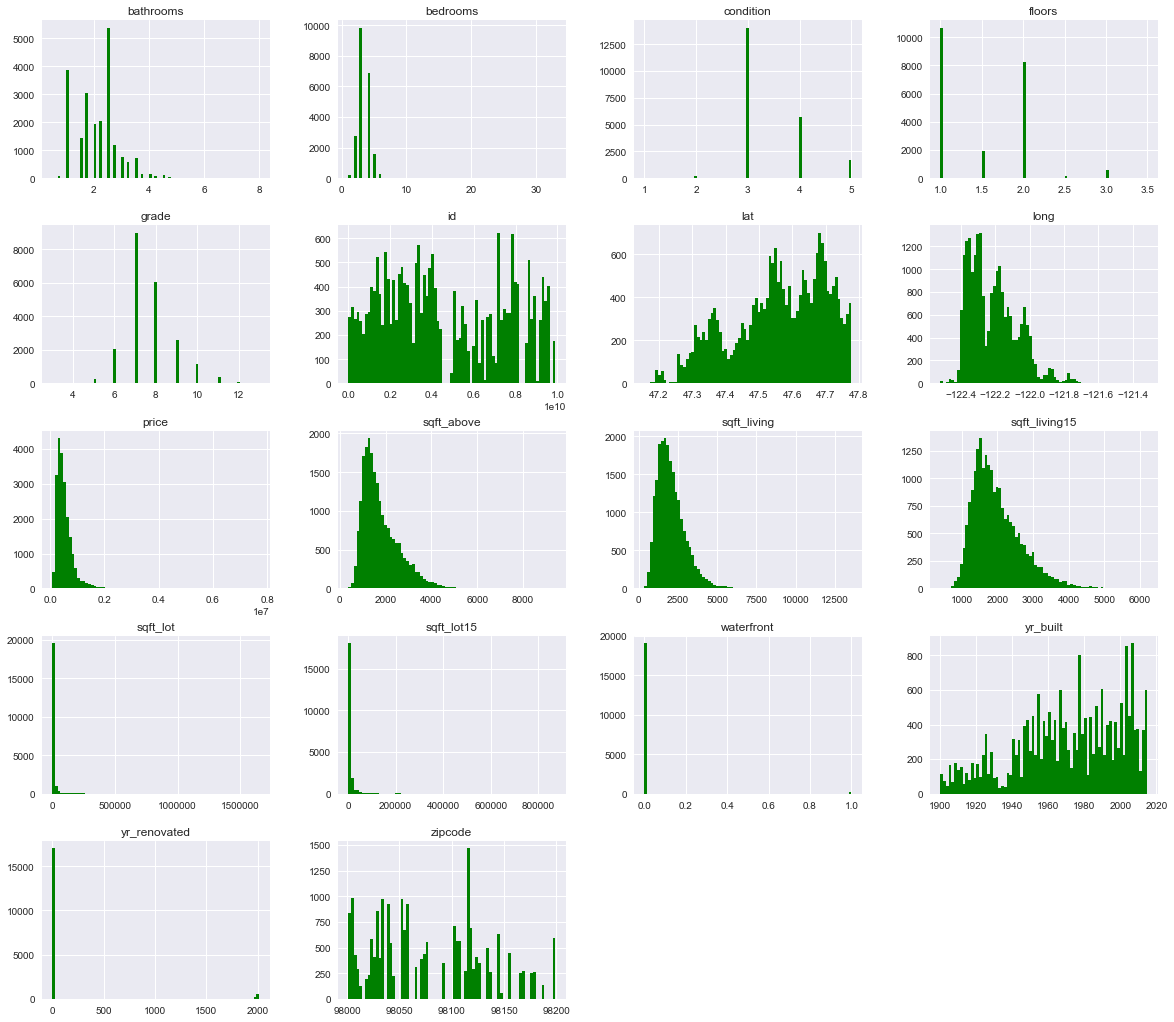

In [19]:
data.hist(figsize = (20,18), bins=75, color='green');

Here we sort all our variables by type:

###### Continuous
* 'date'
* 'price'
* 'sqft_living'
* 'sqft_lot'
* 'sqft_above'
* 'sqft_basement'
* 'yr_built'
* 'yr_renovated'
* 'lat'
* 'long'
* 'sqft_living15'
* 'sqft_lot15'

###### Ordinal
* 'bedrooms'
* 'bathrooms'
* 'floors'
* 'condition'
* 'grade'

###### Categorical
* 'id'
* 'waterfront'
* 'view'
* 'zipcode'

#### 2.3 - Dropping variables we can't easily use for modeling

In [20]:
#With our current visualisation and modeling tools, latitude and longitude will not be useful, so we will drop them
data.drop('lat', axis=1, inplace=True)
data.drop('long', axis=1, inplace=True)

In [21]:
#ID number and ZIP code will not be useful in this analysis either
data.drop('id', axis=1, inplace=True)
data.drop('zipcode', axis=1, inplace=True)

In [22]:
#Waterfront and view only contain data on a very small portion of houses, so we will drop them as well
data.drop('waterfront', axis=1, inplace=True)
data.drop('cat_waterfront', axis=1, inplace=True)
data.drop('view', axis =1, inplace=True)

In [23]:
#based on our previous analysis, yr_renovated does not have enough data to work with, so we will drop it too
data.drop('yr_renovated', axis=1, inplace=True)

Here are the 14 variables that remain:

###### Continuous
* 'date'
* 'price'
* 'sqft_living'
* 'sqft_lot'
* 'sqft_above'
* 'sqft_basement'
* 'yr_built'
* 'sqft_living15'
* 'sqft_lot15'

###### Ordinal
* 'bedrooms'
* 'bathrooms'
* 'floors'
* 'condition'
* 'grade'

In [24]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,1800,7503


#### 2.4 - Translating 'date' to a float type

In [25]:
#defining a function to translate the text date into a float representing years
def mdy_float(date_string):
    #importing the datetime library
    import datetime as dt
    #using the .strptime method to convert string date into a datetime object
    dt_obj = dt.datetime.strptime(date_string, '%m/%d/%Y')
    #fetching year, month, and day, converting them to fractions of a year, and adding them together
    return dt_obj.year + (dt_obj.month-1)/12 + (dt_obj.day-1)/365.25

In [26]:
#iterating through the 'date' column, translating to floats, and writing them to 'yr_sold'
for i, d in data.iterrows():
    data.at[i, 'yr_sold'] = mdy_float(d['date'])

In [27]:
#performing a sanity check on our date translation
data[['date', 'yr_sold']].head()

,date,yr_sold
0,10/13/2014,2014.782854
1,12/9/2014,2014.938569
2,2/25/2015,2015.149042
3,12/9/2014,2014.938569
4,2/18/2015,2015.129877


In [28]:
#dropping the 'date' column
data.drop('date', axis=1, inplace=True)

In [29]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,yr_sold
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,1340,5650,2014.782854
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1690,7639,2014.938569
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,2720,8062,2015.149042
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,1360,5000,2014.938569
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,1800,7503,2015.129877


#### 2.5  - Dealing with hidden mising data

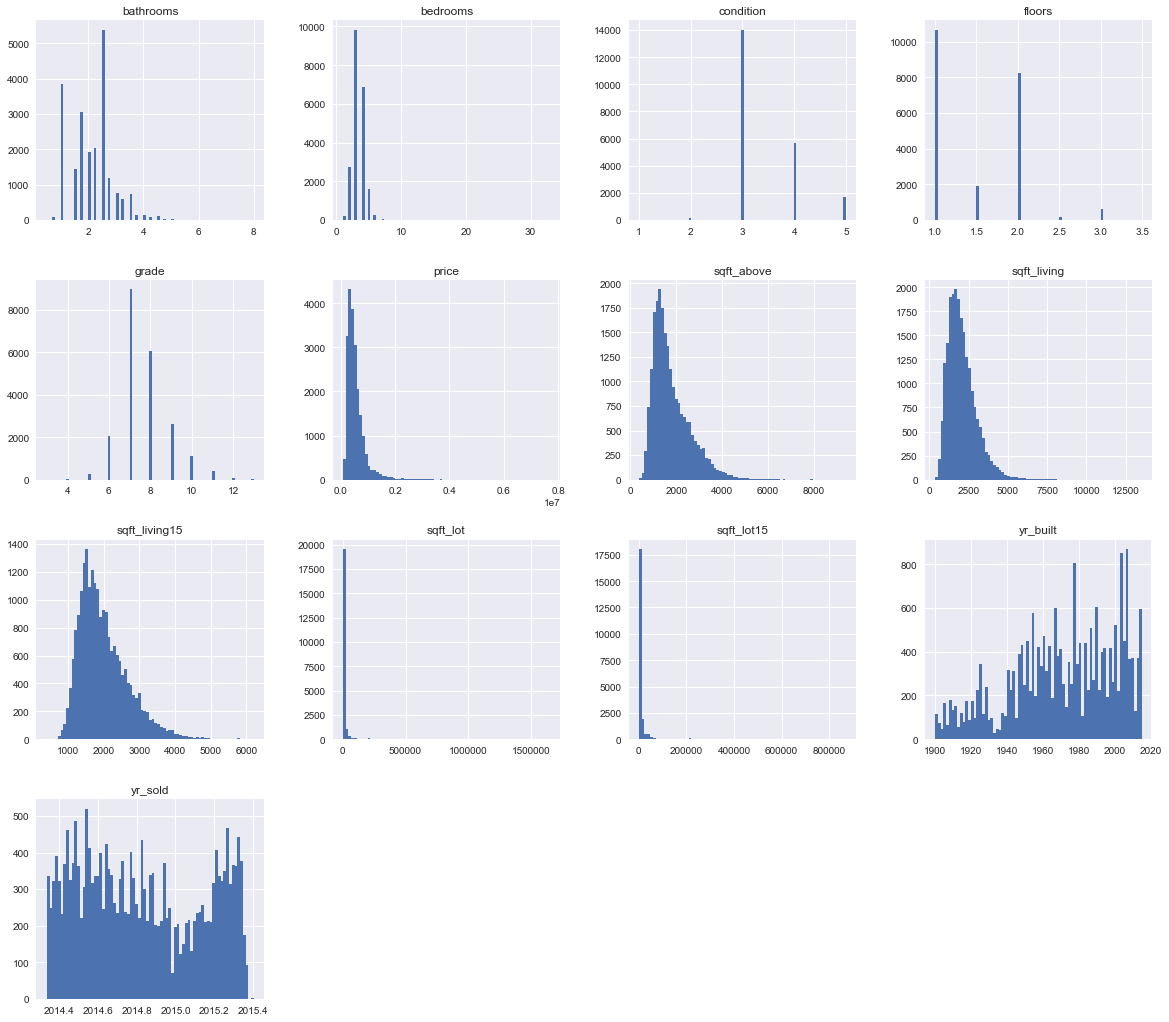

In [30]:
#Here we generate histograms from the remaining columns in our DataFrame
data.hist(figsize = (20,18), bins=75);

'sqft_lot' and 'sqft_lot15' appear to have a suspicious number of low values. We will inspect them more closely with histograms.

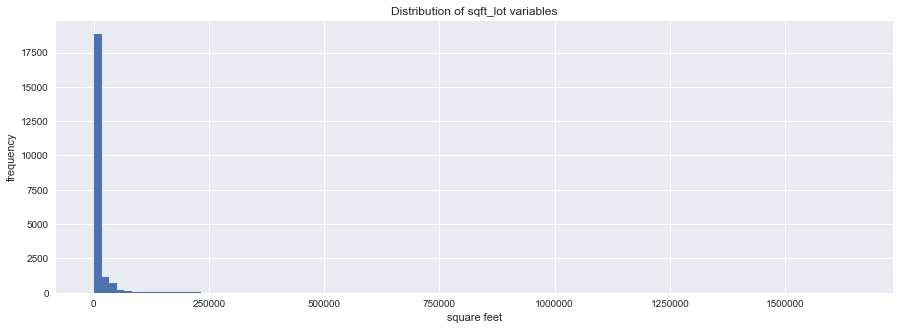

In [31]:
#generating a histogram
data.sqft_lot.hist(bins=100, figsize=(15, 5))
plt.title('Distribution of sqft_lot variables')
plt.xlabel('square feet')
plt.ylabel('frequency')
plt.show()

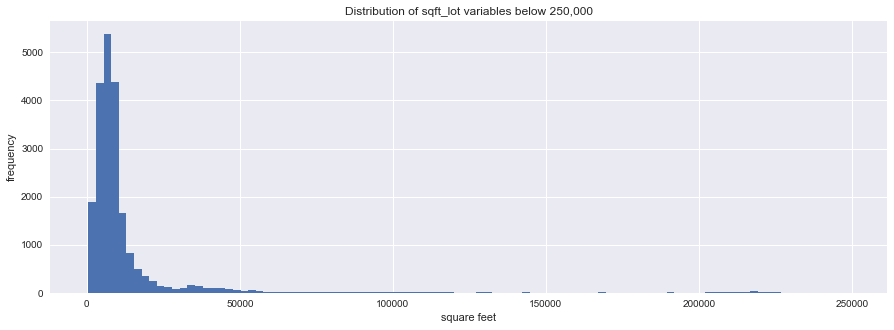

In [32]:
#Perhaps the histogram only looks this way because of an outlier. Let's limit the data to less than 250k.
data.sqft_lot[data['sqft_lot']<250000].hist(figsize=(15,5), bins=100)
plt.title('Distribution of sqft_lot variables below 250,000')
plt.xlabel('square feet')
plt.ylabel('frequency')
plt.show()

In [33]:
#Let's find out how many values are above our threshold of 250k.
data.sqft_lot[data['sqft_lot']>250000].count()

106

In [34]:
#and how many are below
data.sqft_lot[data['sqft_lot']<250000].count()

21491

In [35]:
#Let's get some basic statistics on this variable
data.sqft_lot.describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [36]:
#let's calculate the values at 3 standard deviations above and below the mean
sd_3_above = data.sqft_lot.mean() + data.sqft_lot.std()
sd_3_below = data.sqft_lot.mean() - data.sqft_lot.std()  

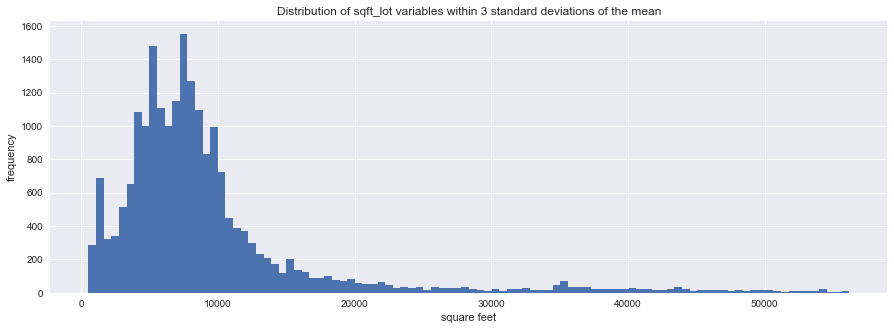

In [37]:
#let's visualize a histogram between these two thresholds
data.sqft_lot[(data['sqft_lot']>sd_3_below)&(data['sqft_lot']<sd_3_above)].hist(figsize=(15,5), bins=100)
plt.title('Distribution of sqft_lot variables within 3 standard deviations of the mean')
plt.xlabel('square feet')
plt.ylabel('frequency')
plt.show()

In [5]:
#this is a somewhat clunky way to examine the distribution within a certain number of standard deviations
#here we'll write a function to generate histograms based on a standard deviation input
def sd_hist(data, sd):
    above = data.mean() + sd*data.std()
    below = data.mean() - sd*data.std()
    selection = data[(data>below)&(data<above)]
    selection.hist(figsize=(15,5), bins=100)
    plt.show()
    sample = data.count()
    percentage = round(selection.count()/sample*100, 2)
    return '{} or {}% of values are within {} standard deviations of the mean.'.format(sample, percentage, sd)

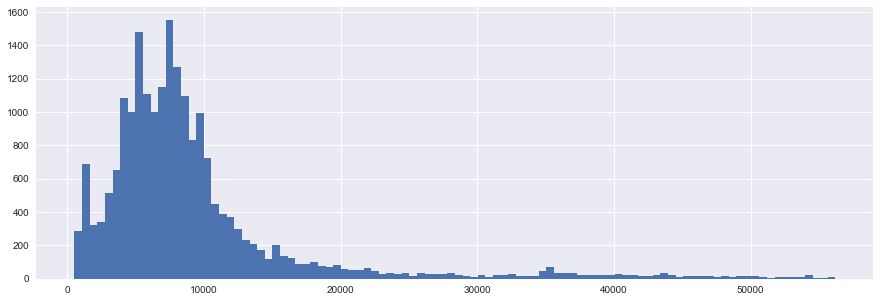

'21597 or 96.47% of values are within 1 standard deviations of the mean.'

In [7]:
#running the function on 'sqft_lot'
sd_hist(data['sqft_lot'], 1)

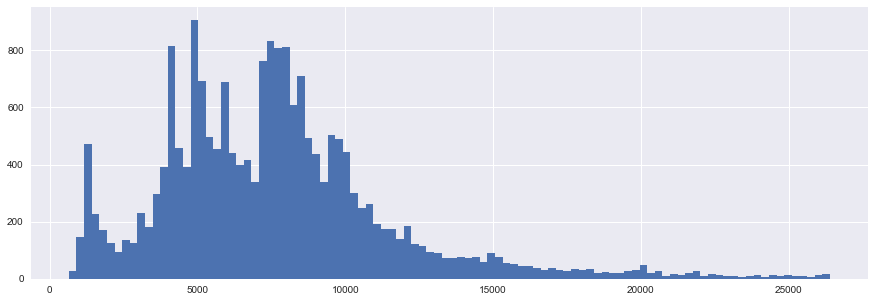

'21597 or 92.81% of values are within 0.5 standard deviations of the mean.'

In [9]:
#running the function on 'sqft_lot15'
sd_hist(data['sqft_lot15'], .5)

Our close-up observation of these variables doesn't show us any peculiar or missing values, but they have a strong positive skew. We will deal with this after removing outliers and performing a multicollinearity check on all variables.

#### 2.5 - Dealing with outliers

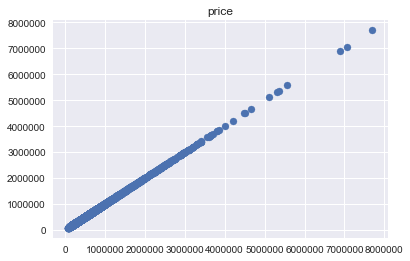

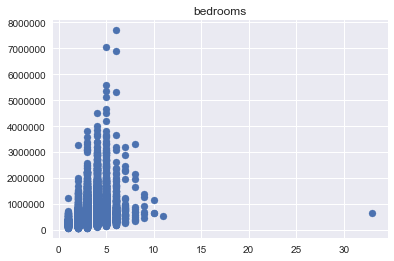

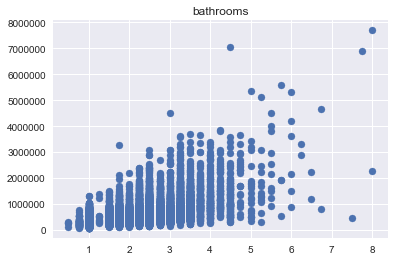

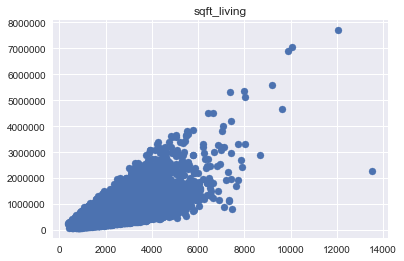

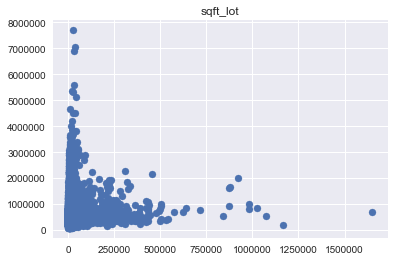

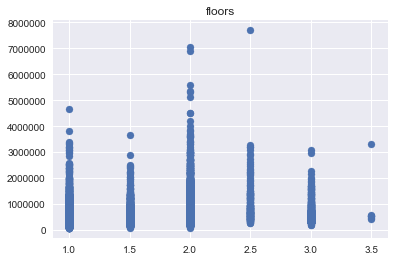

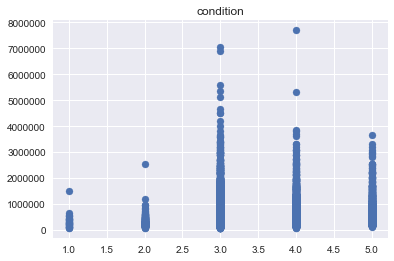

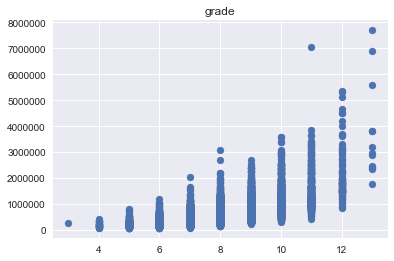

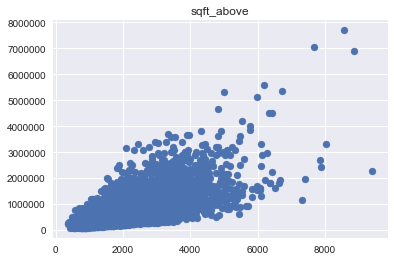

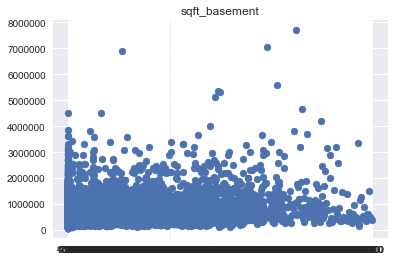

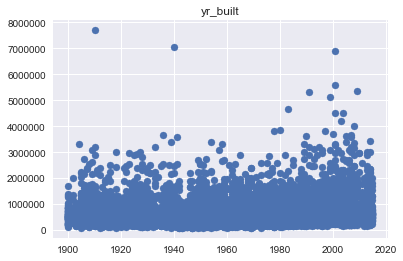

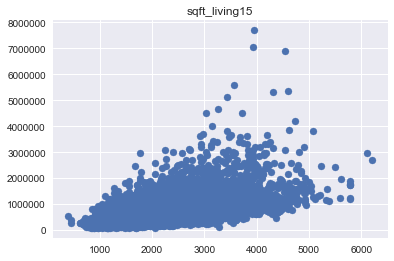

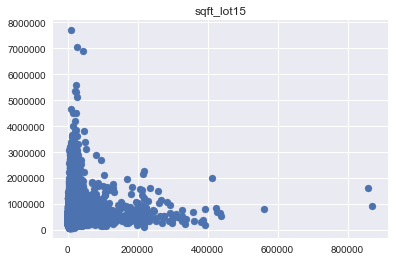

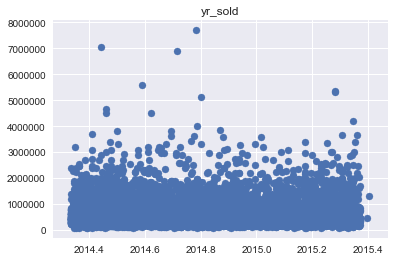

In [41]:
#Let's generate some scatter plots on our variables' relationships with price
for column in data.columns:
    plt.scatter(data[column],data.price)
    plt.title(column)
    plt.show()

In [42]:
#Looking at these scatter plots, we immediately notice that 
#removing homes over $4,000,000 would improve model fit
data = data.loc[data['price']<4000000]
#We should also remove the house with 30+ bedrooms, as it is a clear outlier, 
#and probably something the sneaky folks over at Flatiron added to mess with us.
data = data.loc[data['bedrooms']<30]


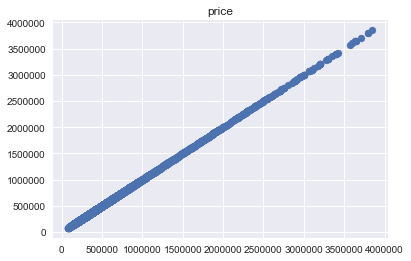

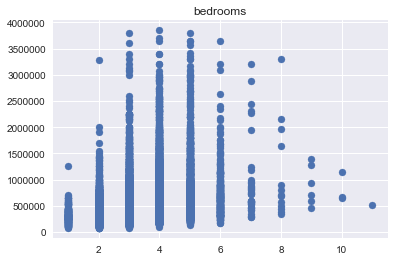

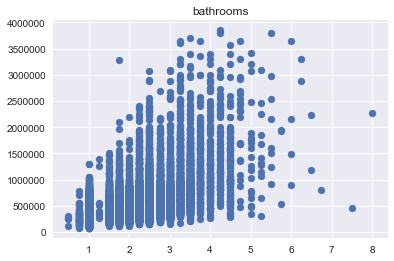

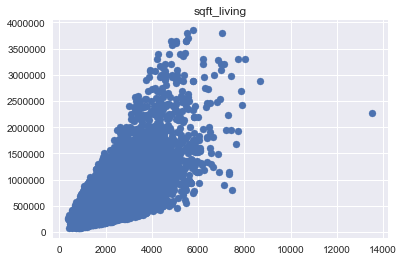

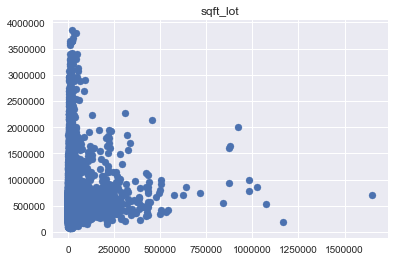

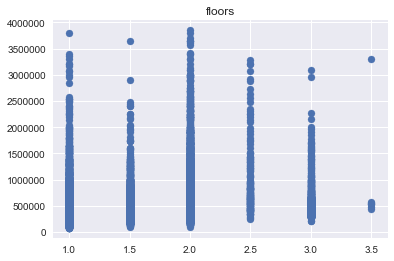

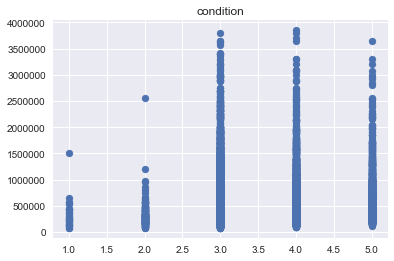

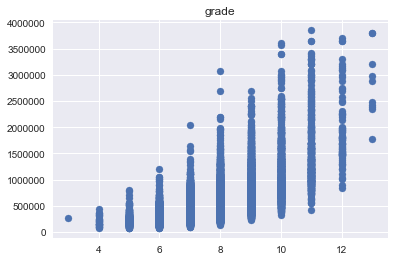

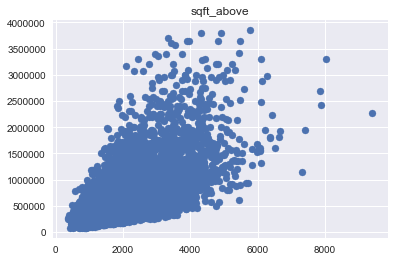

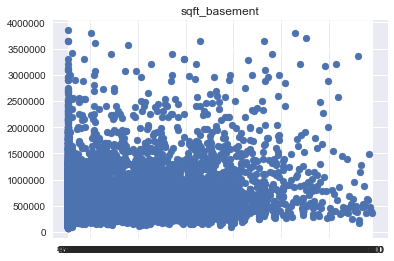

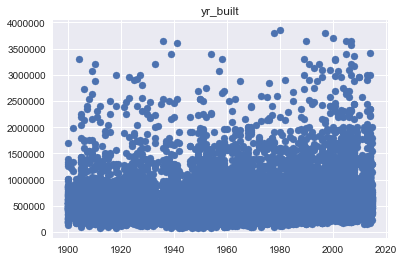

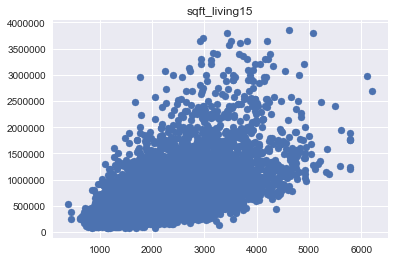

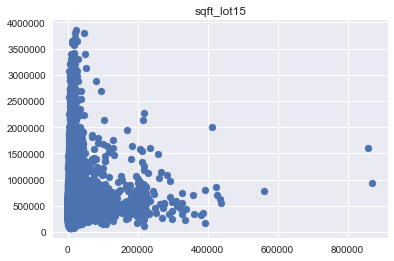

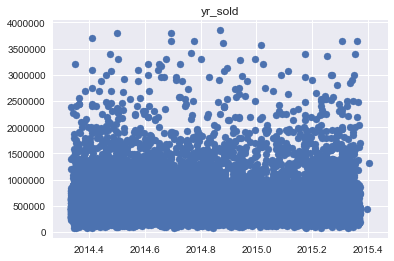

In [43]:
#rechecking the scatter plots
for column in data.columns:
    plt.scatter(data[column],data.price)
    plt.title(column)
    plt.show()

In [44]:
#let's also remove the house with over 13,000 square feet of living space, 
#and the house with over 1,500,000 square feet of lot space
data = data.loc[data['sqft_living']<13000]
data = data.loc[data['sqft_lot']<1500000]

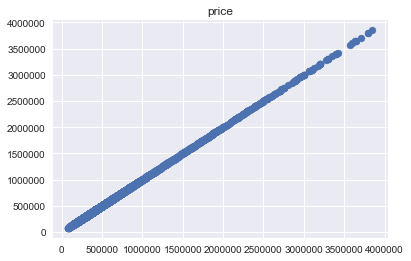

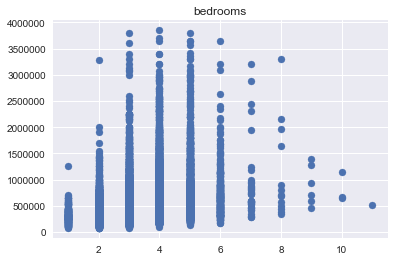

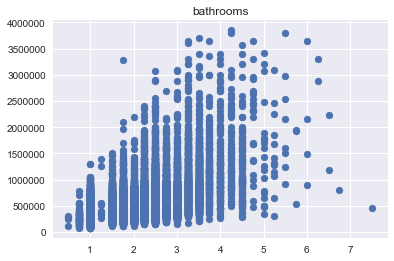

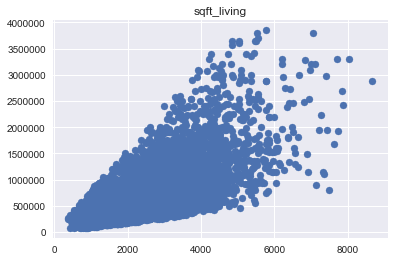

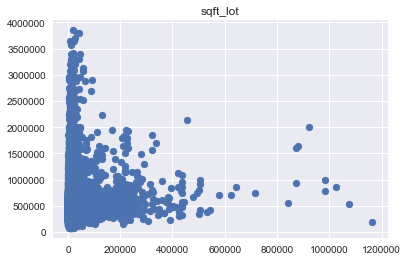

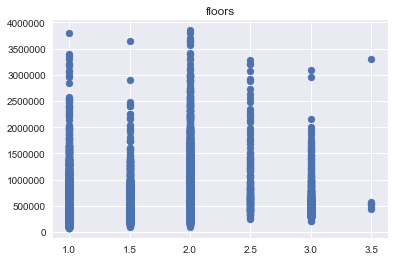

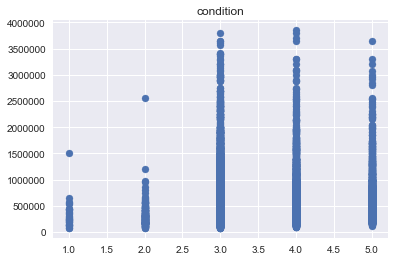

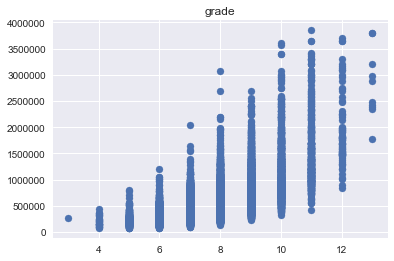

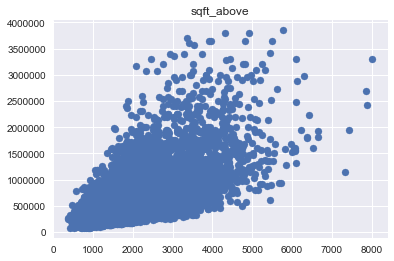

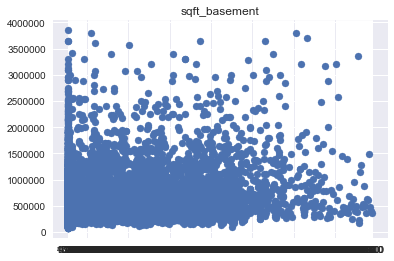

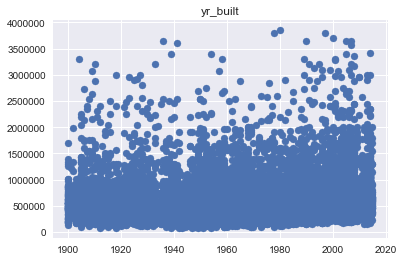

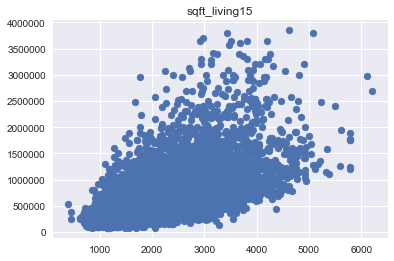

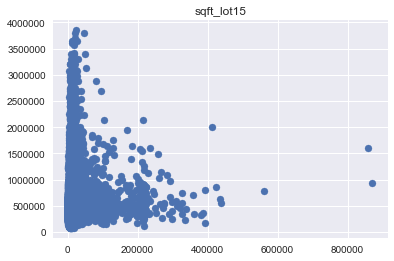

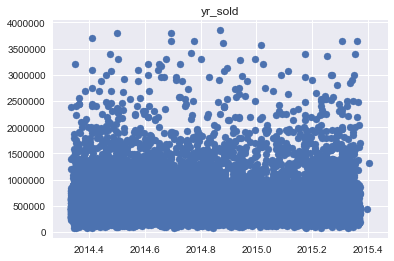

In [45]:
#generating more scatter plots
for column in data.columns:
    plt.scatter(data[column],data.price)
    plt.title(column)
    plt.show()

Our data now excludes the most outrageous outliers.

#### 2.6 - Checking for multicollinearity

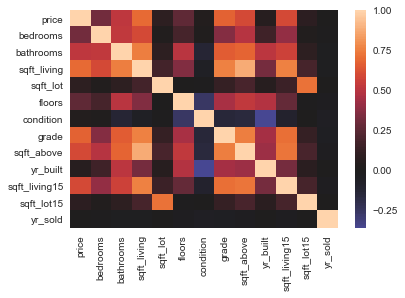

In [46]:
#using Seaborn to create a multicollinearity heatmap
sns.heatmap(data.corr(), center=0);

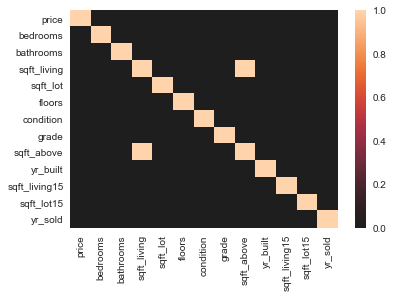

In [47]:
#How about we set a threshold of 0.8 so we can see the worst offending variables
sns.heatmap(data.corr()>.8, center=0)

In [48]:
#'sqft_living' and 'sqft_above' are strongly correlated. 
#Since 'sqft_above' has a poorer correlation with 'price', we will drop that column.
data.drop('sqft_above', axis=1, inplace=True)

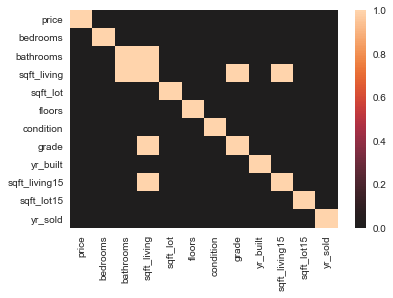

In [49]:
#let's recheck the data for more relationships, this time with a threshold of 0.75
sns.heatmap(data.corr()>0.75, center=0)

In [50]:
#now we see that 'sqft_living' has a relationship with 'grade,' 'sqft_living15,' and 'bathroomsrooms'.''
#Let's look at the correlation table to check which one is worth keeping based on
#its relationship with 'price.'
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,sqft_living15,sqft_lot15,yr_sold
price,1.000000,0.317723,0.520052,0.694258,0.093325,0.263664,0.040654,0.677760,0.053890,0.597237,0.083363,-0.002613
bedrooms,0.317723,1.000000,0.526256,0.594834,0.031918,0.182631,0.023817,0.363608,0.160505,0.402393,0.029869,-0.015013
bathrooms,0.520052,0.526256,1.000000,0.751753,0.091937,0.503754,-0.126496,0.662624,0.510093,0.567453,0.087082,-0.033802
sqft_living,0.694258,0.594834,0.751753,1.000000,0.179609,0.355535,-0.058817,0.762763,0.322114,0.759126,0.183898,-0.033309
sqft_lot,0.093325,0.031918,0.091937,0.179609,1.000000,-0.004422,-0.010587,0.120509,0.057941,0.147362,0.720017,0.004652
floors,0.263664,0.182631,0.503754,0.355535,-0.004422,1.000000,-0.263966,0.458677,0.489279,0.279074,-0.011315,-0.022175
condition,0.040654,0.023817,-0.126496,-0.058817,-0.010587,-0.263966,1.000000,-0.146617,-0.361380,-0.092646,-0.003441,-0.051058
grade,0.677760,0.363608,0.662624,0.762763,0.120509,0.458677,-0.146617,1.000000,0.448623,0.712494,0.121336,-0.039380
yr_built,0.053890,0.160505,0.510093,0.322114,0.057941,0.489279,-0.361380,0.448623,1.000000,0.326421,0.072006,-0.000270
sqft_living15,0.597237,0.402393,0.567453,0.759126,0.147362,0.279074,-0.092646,0.712494,0.326421,1.000000,0.182635,-0.031190


In [51]:
#'sqft_living' has the highest correlation with price of all four variables, 
#so we will drop the other three from the dataset.
data.drop('grade', axis=1, inplace=True)
data.drop('sqft_living15', axis=1, inplace=True)
data.drop('bathrooms', axis=1, inplace=True)

#### 2.7 - Normalizing and scaling variables

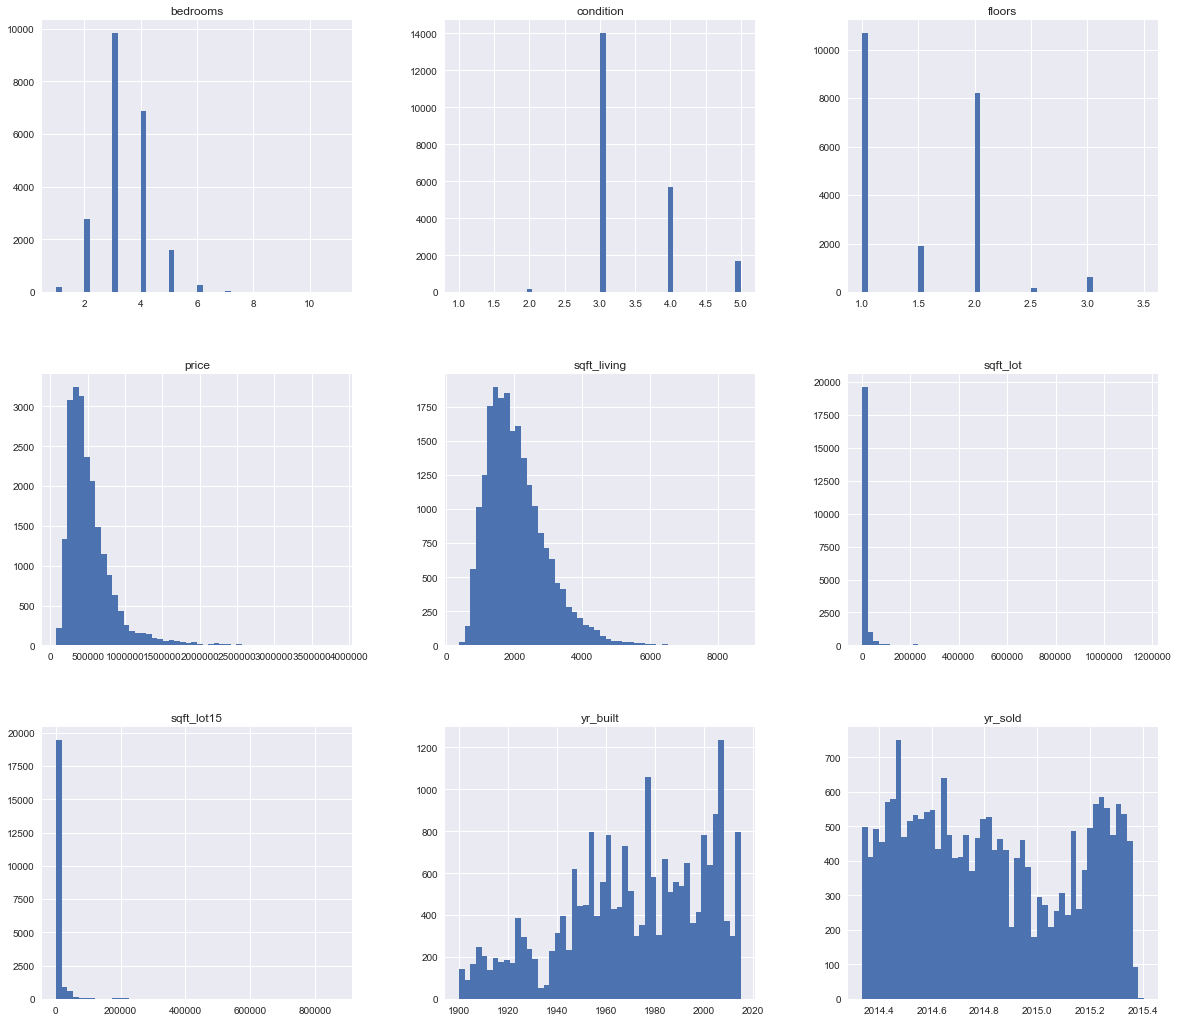

In [52]:
#let's fetch histograms for each variable in our data
data.hist(figsize=(20,18), bins=50)
plt.show()

None of these distributions appear very normal, so we will apply the Numpy log function to all of them.

In [53]:
#normalize all variables except the target variable
log_data = pd.DataFrame([])
log_data['bedrooms'] = np.log(data['bedrooms'])
log_data['condition'] = np.log(data['condition'])
log_data['floors'] = np.log(data['floors'])
log_data['sqft_living'] = np.log(data['sqft_living'])
log_data['sqft_lot'] = np.log(data['sqft_lot'])
log_data['sqft_lot15'] = np.log(data['sqft_lot15'])
log_data['yr_built'] = np.log(data['yr_built'])
log_data['yr_sold'] = np.log(data['yr_sold'])

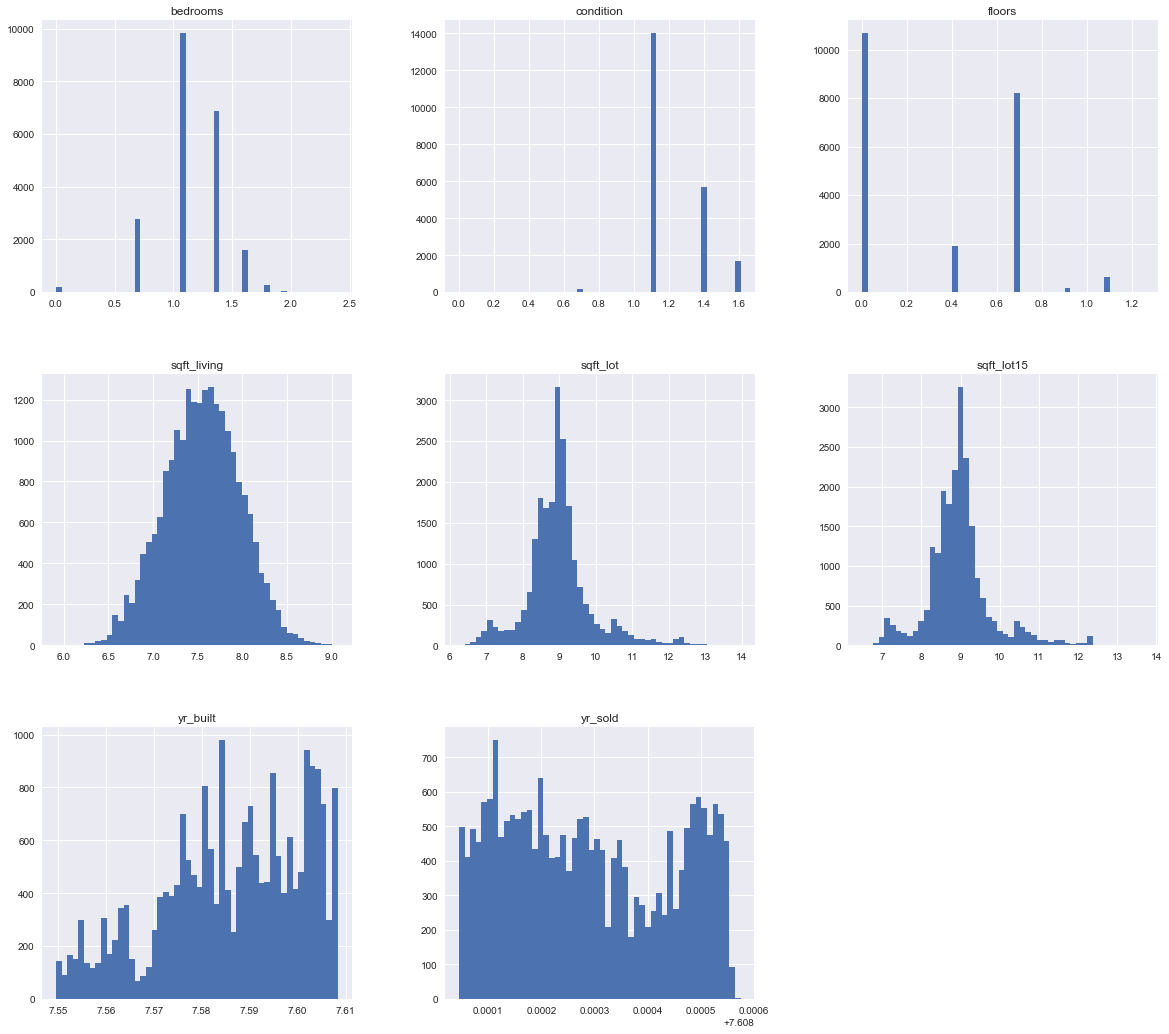

In [54]:
#checking our log-transformed data
log_data.hist(figsize=(20,18), bins=50)
plt.show()

In [55]:
#Now that the distributuions are fairly normal, we will scale each data point
#by converting it to a z-score. Here is a function written to make things more readable.
def point_to_zscore(data):
    return (data-data.mean())/data.std()

In [56]:
scaled_log_data = pd.DataFrame([])
scaled_log_data['bedrooms'] = point_to_zscore(log_data['bedrooms'])
scaled_log_data['condition'] = point_to_zscore(log_data['condition'])
scaled_log_data['floors'] = point_to_zscore(log_data['floors'])
scaled_log_data['sqft_living'] = point_to_zscore(log_data['sqft_living'])
scaled_log_data['sqft_lot'] = point_to_zscore(log_data['sqft_lot'])
scaled_log_data['sqft_lot15'] = point_to_zscore(log_data['sqft_lot15'])
scaled_log_data['yr_built'] = point_to_zscore(log_data['yr_built'])
scaled_log_data['yr_sold'] = point_to_zscore(log_data['yr_sold'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f458653f828>,
      dtype=object)

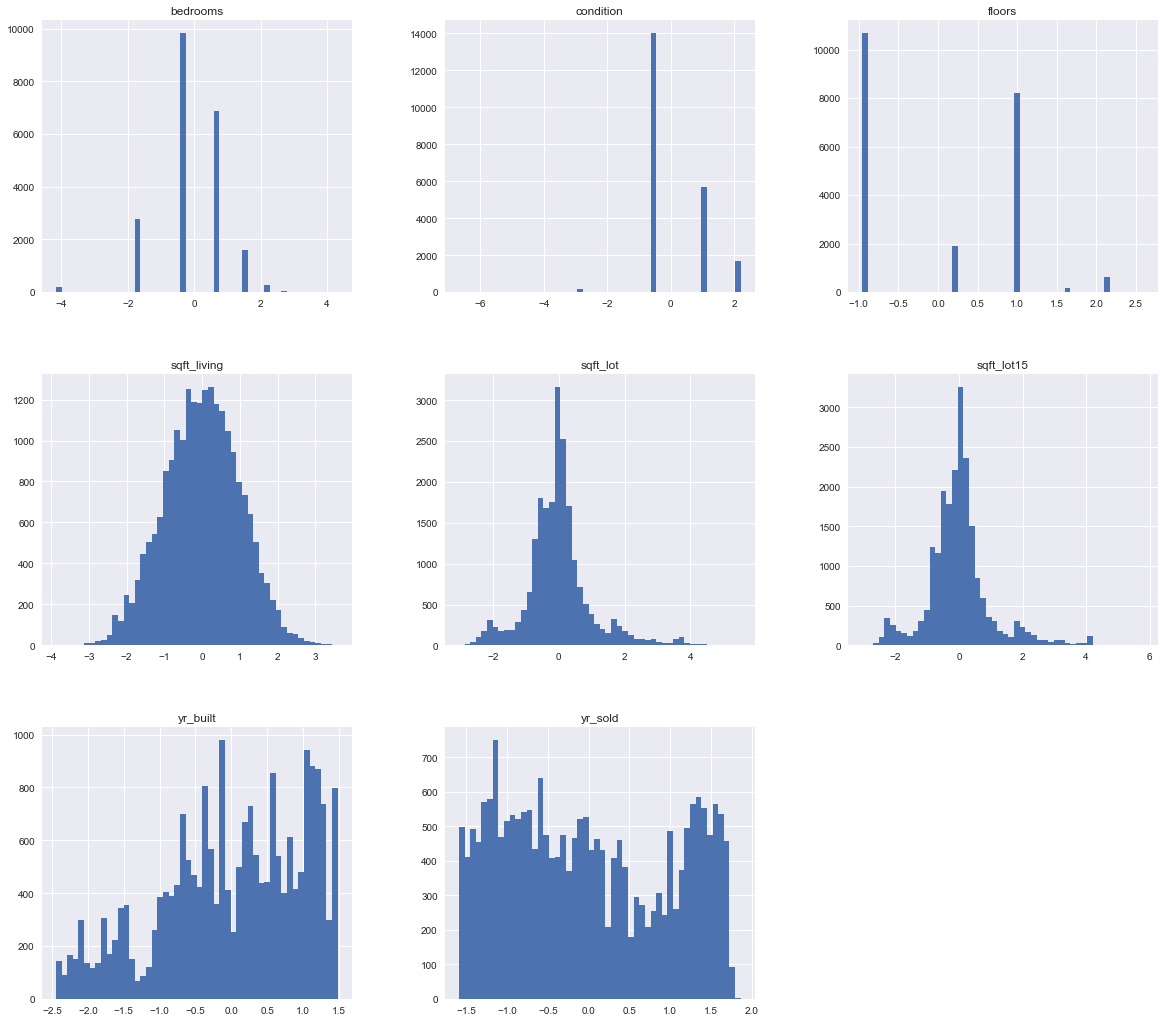

In [57]:
scaled_log_data.hist(figsize=(20,18), bins=50)

It looks like everything is normalized and scaled. Let's perform one more multicollinearity check before exploring our data.

#### 2.8 - Checking for multicollinearity once more

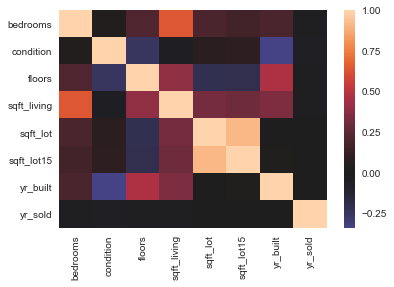

In [58]:
#Generating a seaborn heatmap
sns.heatmap(scaled_log_data.corr(), center=0);

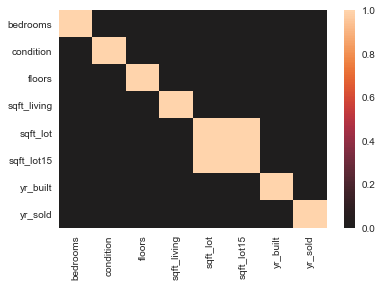

In [59]:
#Regenerating the heatmap with a threshold of 0.8
sns.heatmap(scaled_log_data.corr()>0.8, center=0);

In [60]:
#'sqft_lot' and 'sqft_lot15 are highly correlated. #Let's print the correlation
#table and keep the variable that has the strongest relationship with price.
scaled_log_data.corr()

,bedrooms,condition,floors,sqft_living,sqft_lot,sqft_lot15,yr_built,yr_sold
bedrooms,1.000000,0.033089,0.213160,0.648796,0.195012,0.174854,0.194973,-0.015720
condition,0.033089,1.000000,-0.252411,-0.039711,0.072806,0.081505,-0.339065,-0.049255
floors,0.213160,-0.252411,1.000000,0.393057,-0.213175,-0.204445,0.471556,-0.023294
sqft_living,0.648796,-0.039711,0.393057,1.000000,0.324583,0.301781,0.349329,-0.034004
sqft_lot,0.195012,0.072806,-0.213175,0.324583,1.000000,0.918496,-0.004542,-0.010084
sqft_lot15,0.174854,0.081505,-0.204445,0.301781,0.918496,1.000000,0.021412,-0.011855
yr_built,0.194973,-0.339065,0.471556,0.349329,-0.004542,0.021412,1.000000,-0.000197
yr_sold,-0.015720,-0.049255,-0.023294,-0.034004,-0.010084,-0.011855,-0.000197,1.000000


In [61]:
#'sqft_lot' has a stronger relationship with price, so we will drop 'sqft_lot15'
scaled_log_data.drop('sqft_lot15', axis=1, inplace=True)

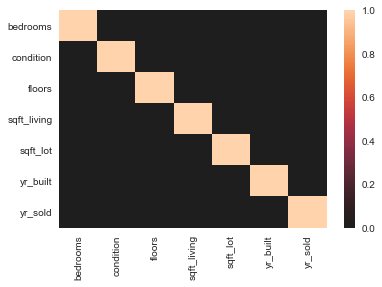

In [62]:
#Regenerating the heatmap with a threshold of 0.75
sns.heatmap(scaled_log_data.corr()>0.75, center=0);

Multicollinearity is within acceptable levels for all variables in our current set, so we will move on to data exploration.

### 3 - Explore

#### 3.1 - Initial scatter plots

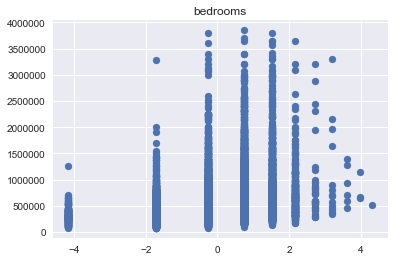

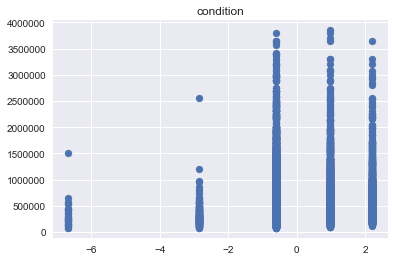

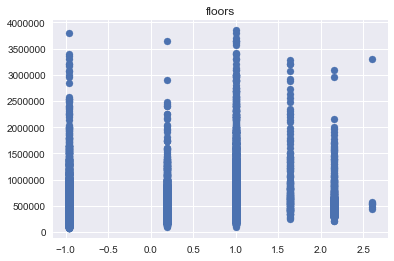

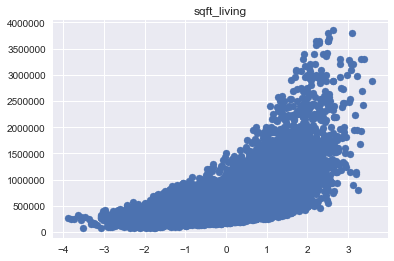

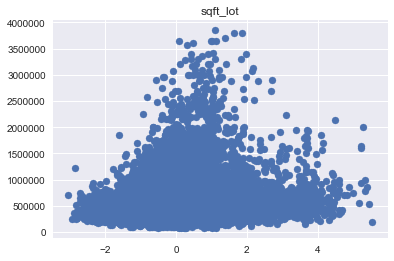

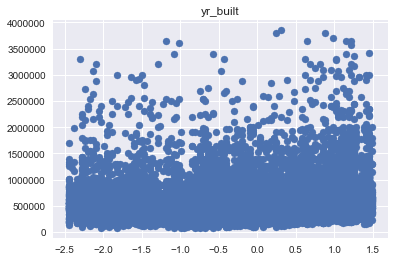

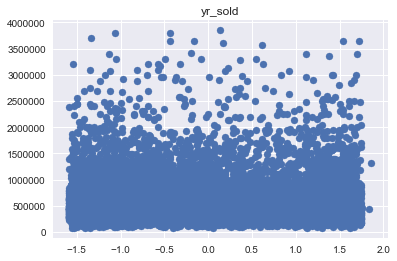

In [63]:
for column in scaled_log_data.columns:
    plt.scatter(scaled_log_data[column],data.price)
    plt.title(column)
    plt.show()

Based on the scatter plots we've made of each variable versus the target variable 'price,' we can create a short list of variables with decently linear relationships to 'price.'
* bedrooms
* sqft_living


<div style="background-color:darksalmon">
    Q2 - Does the age of a house predict its price better than the date it was built or sold?

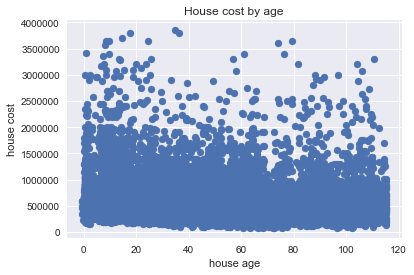

In [64]:
#yr_built and yr_sold alone don't yield any strong relationships with price, so
#let's go back to our original data sheet and subtract them to find house age.
scaled_log_data['age'] = data.yr_sold - data.yr_built
plt.scatter(scaled_log_data.age, data.price)
plt.xlabel('house age')
plt.ylabel('house cost')
plt.title('House cost by age')
plt.show()

In [65]:
#We'll use numpy's corrcoef function to calculate the Pearson product-moment 
#correlation coefficient for 'age' and compare it to the columns from
#which it was calculated
r_age = np.corrcoef([scaled_log_data.age, data.price])[0][1]
r_built = np.corrcoef(data.yr_built, data.price)[0][1]
r_sold = np.corrcoef(data.yr_sold, data.price)[0][1]
print(f'Age: {r_age}\nBuilt: {r_built}\nSold: {r_sold}')

Age: -0.05391450146450842
Built: 0.053890118923138004
Sold: -0.002612523244436397


In [66]:
#'age' has a slightly stronger relationship with price than its parent variables,
#so we will remove 'yr_built' and 'yr_sold.'
scaled_log_data.drop('yr_built', axis=1, inplace=True)
scaled_log_data.drop('yr_sold', axis=1, inplace=True)

In [67]:
#Let's look at our current data to see what we have before modeling
scaled_log_data.head()

,bedrooms,condition,floors,sqft_living,sqft_lot,age
0,-0.278906,-0.613390,-0.960460,-1.127530,-0.387773,59.782854
1,-0.278906,-0.613390,1.007462,0.714114,-0.112200,63.938569
2,-1.713842,-0.613390,-0.960460,-2.137510,0.246014,82.149042
3,0.739197,2.204368,-0.960460,0.073030,-0.523446,49.938569
4,-0.278906,-0.613390,-0.960460,-0.291685,0.009349,28.129877


### 4 - Model

#### 4.1 - Split the data into training and test sets

In [68]:
#import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [69]:
#assign independent and dependent variables to X and y respectively
X = np.array(scaled_log_data)
y = np.array(data.price)

In [70]:
#generate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

#### 4.2 - Simple regression analysis in scikit learn

In [71]:
#import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [72]:
#instantiate LinearRegression object
regressor = LinearRegression()

In [73]:
#perform regression analysis
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
#fetching the intercept
regressor.intercept_

416767.62974960264

In [75]:
#fetching the coefficients
regressor.coef_

array([-61907.2368121 ,  11068.57813345,  39450.94158875, 272999.67873625,
       -14136.86333046,   2750.94961348])

In [76]:
#using our model to predict house prices based on our test data
y_pred = regressor.predict(X_test)

In [77]:
#writing actual and predicted values to a results DataFrame
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head()

,Actual,Predicted
0,330000.0,545533.251730
1,545000.0,380175.427616
2,635000.0,523718.883476
3,433500.0,343810.663671
4,475226.0,619949.217543


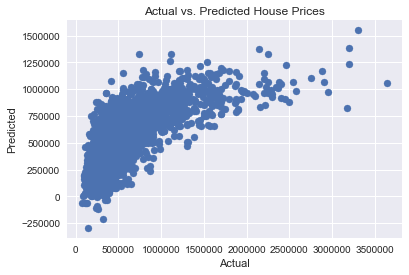

In [78]:
#generating a scatter plot to visualize the accuracy of our model
plt.scatter(results['Actual'], results['Predicted'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

This model obviously doesn't predict house prices very well. Let's utilize scikit learn's feature selection function to improve our predictions. 

#### 4.3 - Feature selection

##### 4.3.1 - Simple selection

In [79]:
#import recursive feature selection function from scikit learn
from sklearn.feature_selection import RFE

In [80]:
#instantiating the recursive feature selector and passing in our data
selector = RFE(regressor, n_features_to_select=3)
selector = selector.fit(X_train, y_train)

In [81]:
#fetching which variables are most useful for price prediction
ranks = selector.ranking_

In [82]:
#amalgamating our data into a legible table
names = list(scaled_log_data.columns)
ranks = list(ranks)
table = dict(zip(names, ranks))
key = pd.DataFrame(table, index=[0])
key

,bedrooms,condition,floors,sqft_living,sqft_lot,age
0,1,1,3,1,2,4


<div style="background-color:darksalmon">
    Q3 - Based on this readout, 'bedrooms,' 'condition,' and 'sqft_living' are the top 3 variables, but how many variables should we really use?

##### 4.3.2 - Selecting the ideal number of features based on R<sup>2</sup>

We will use a loop to run the feature selector, increasing the value of the 'n_features_to_select' keyword argument each time around. Then we will produce a visualization of R<sup>2</sup> values to see when adding more variables produces diminishing returns, revealing the ideal number of variables for our model.

In [84]:
#import Scikit Learn Metrics
import sklearn.metrics as sklm

In [85]:
#create list to hold r-squared values
r_squared = []

In [86]:
#fetch r-squared values for different numbers of features and store in list
for i in [1,2,3,4,5,6]:  
    selector = RFE(regressor, n_features_to_select=i)
    selector = selector.fit(X_train, y_train)
    y_pred = selector.predict(X_test)
    r_squared.append(sklm.r2_score(y_test, y_pred))

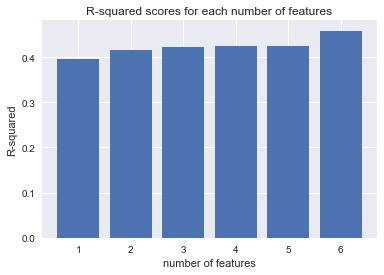

In [87]:
#plot r_squared list
feature_num = [1,2,3,4,5,6]
plt.bar(feature_num, r_squared)
plt.title('R-squared scores for each number of features')
plt.xlabel('number of features')
plt.ylabel('R-squared')
plt.show()

In [88]:
#r-squared seems to level off around 3 features, so we will get the
#feature rankings and find those features
selector = RFE(regressor, n_features_to_select=3)
selector = selector.fit(X_train, y_train)
ranks = selector.ranking_

In [89]:
#let's regenerate our data legend
names = list(scaled_log_data.columns)
ranks = list(ranks)
table = dict(zip(names, ranks))
key = pd.DataFrame(table, index=[0])
key

,bedrooms,condition,floors,sqft_living,sqft_lot,age
0,1,1,3,1,2,4


In [90]:
#Creating DataFrame with useful predictive variables
useful_predictors = scaled_log_data[['bedrooms', 'condition', 'sqft_living']]

We will go forward into checking p-values with our 3 selected variables: 
* bedrooms
* condition
* sqft_living

#### 4.4 - Checking p-values

In [91]:
#importing part of the statsmodels library
import statsmodels.api as sm

In [92]:
#here we briefly return to our data before it was split
X_bedrooms = scaled_log_data[['bedrooms', 'condition', 'sqft_living']]
X_bedrooms_2 = sm.add_constant(X_bedrooms)
est = sm.OLS(y, X_bedrooms_2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     4941.
Date:                Fri, 25 Jan 2019   Prob (F-statistic):               0.00
Time:                        02:10:55   Log-Likelihood:            -3.0036e+05
No. Observations:               21582   AIC:                         6.007e+05
Df Residuals:                   21578   BIC:                         6.008e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.375e+05   1823.278    294.799      

According to the summary, all selected variables have a p-value of <0.001, which indicates they are satisfactory for modeling.

#### 4.5 - Modeling with selected features

In [93]:
#using sklearn to split data into train and test sets again
X_useful = np.array(useful_predictors)
X_train_useful, X_test_useful, y_train_useful, y_test_useful = train_test_split(X_useful, y, test_size=0.2, random_state=37)

In [94]:
#fitting a model with our new data selection
regressor.fit(X_train_useful, y_train_useful)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
y_pred_useful = regressor.predict(X_test_useful)

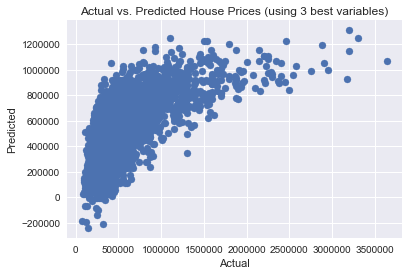

In [96]:
results_useful = pd.DataFrame({'Actual': y_test_useful, 'Predicted': y_pred_useful})
plt.scatter(results_useful['Actual'], results_useful['Predicted'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices (using 3 best variables)')
plt.show()

#### 4.6 - Validating the training and test sets

In [97]:
#fetching root mean squared error
rms_error = round(np.sqrt(sklm.mean_squared_error(y_pred, y_test)),2)
print(f'The model has a root mean square error of ${rms_error}.')

The model has a root mean square error of $253437.19.


This level of error is not ideal, but it is satisfactory for our purposes.

#### 4.7 - Visualizing the regression model

In [98]:
#storing coefficients of the 3 regression lines in a variable
co = regressor.coef_

In [99]:
#storing the intercept value from the regression analysis
inter = regressor.intercept_

In [100]:
#calculating the size of the training data set
train_n = np.array(range(X_train_useful.shape[0]))

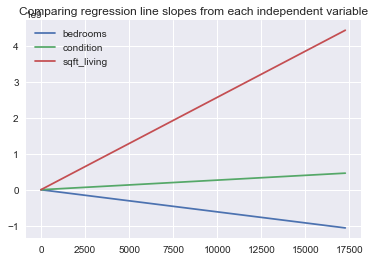

In [101]:
#calculating the y values for 'bedrooms' based on the slope and intercept
train_n_y = train_n*co[0]+inter
plt.plot(train_n, train_n_y, label='bedrooms')
#calculating the y values for 'condition' based on the slope and intercept
train_n_y = train_n*co[1]+inter
plt.plot(train_n, train_n_y, label='condition')
#calculating the y values for 'sqft_living' based on the slope and intercept
train_n_y = train_n*co[2]+inter
plt.plot(train_n, train_n_y, label='sqft_living')

plt.title('Comparing regression line slopes from each independent variable')
plt.legend()
plt.show()

### 5 - Interpret

The final model was calculated using data from three variables: 'sqft_living','condition', and 'bedrooms'. 'sqft_living represents the square footage of living space for each house, which has the most positive relationship with sale price. 'condition' represents the overall condition of a house, and has a very slight positive relationship with price. The 3rd variable, 'bedrooms' stores the number of bedrooms in each house, having a fair negative relationship with house price. Overall, the square footage of living space and number of bedrooms are the best indicators of house price in the King County, Washington market.

**Recommendations for increasing a home's sale price:**
1. Build an addition. By far the strongest predictor of home price is the square footage of living space. Adding a sunroom behind the house or a bedroom above the garage could set a home apart.
2. Make improvements. Things like replacing a roof, repairing a cracked foundation, or installing new windows will improve the condition rating of a home. Homes with greater condition ratings tend to garner higher prices. 
3. Upgrade some bathrooms. There's a decent relationship between the number of bathrooms in a house and sale price. If you have fewer than 5 bathrooms, it may be worth remodeling a half-bath into a full-bath.